## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group dataframe by Drug Regimen
stats_table = mouse_study_df.groupby("Drug Regimen")
# Show Tumor Volume mean
stats_table = stats_table["Tumor Volume (mm3)"]

# Create median of Tumor Volume
volume_median = stats_table.median()

# Create mean of Tumor Volume
volume_mean = stats_table.mean()

# Create variance of Tumor Volume
volume_variance = stats_table.var()

# Crate standard deviation of Tumor Volume
volume_stdev = stats_table.std()

In [3]:
# Create SEM of Tumor Volume

# Rename Tumor Volume Column, to pass through functions more easily
renamed = mouse_study_df.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume"})

# Create samples
nsamples = 10
size = 20
samples = [renamed.sample(size) for x in range(0,nsamples)]

# Calculate means of samples
means = [s.Tumor_Volume.mean() for s in samples]

# Calculate standard error of means
volume_SEM = [sem(s.Tumor_Volume) for s in samples]

In [4]:
# Create summary table as data frame
Summary_Table = pd.DataFrame({
    "Tumor Volume Mean": volume_mean,
    "Tumor Volume Median": volume_median,
    "Tumor Volume Variance": volume_variance,
    "Tumor Volume Standard Deviation": volume_stdev,
    "Tumor Volume SEM": volume_SEM
})
Summary_Table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,1.670679
Ceftamin,52.591172,51.776157,39.290177,6.268188,1.816811
Infubinol,52.884795,51.820584,43.128684,6.567243,2.146238
Ketapril,55.235638,53.698743,68.553577,8.279709,2.280455
Naftisol,54.331565,52.509285,66.173479,8.134708,1.996543
Placebo,54.033581,52.288934,61.168083,7.821003,1.442529
Propriva,52.322552,50.854632,42.351070,6.507770,2.047347
Ramicane,40.216745,40.673236,23.486704,4.846308,2.045705
Stelasyn,54.233149,52.431737,59.450562,7.710419,1.873729


## Bar plots

Text(0, 0.5, 'Number of Test Subjects')

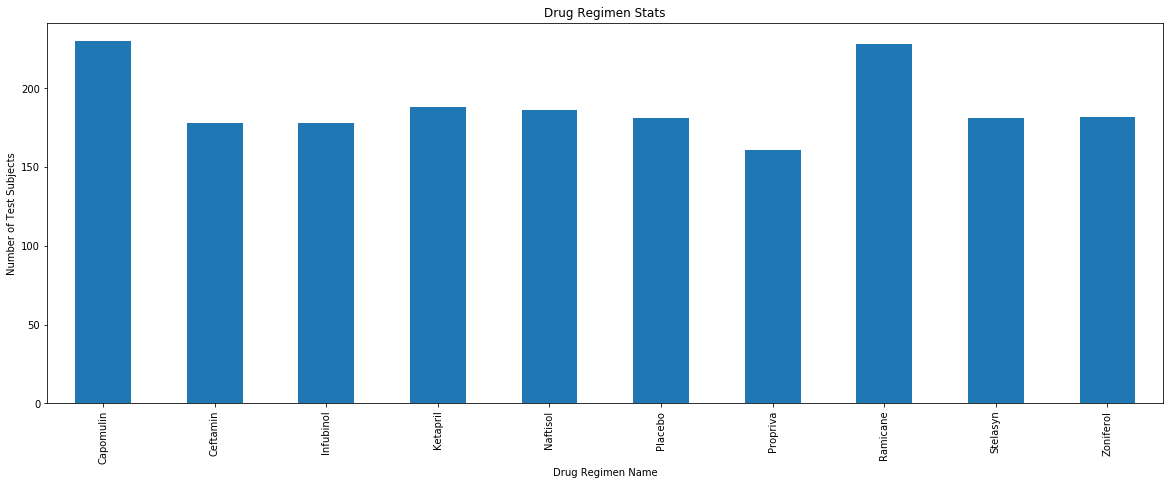

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Use data frame grouped by drug regimen (stats_table). Call count function
regimen_data = stats_table.count()

# Generate plot
regimen_data.plot(kind="bar", figsize=(20,7))

# Set a Title and labels
plt.title("Drug Regimen Stats")
plt.xlabel("Drug Regimen Name")
plt.ylabel("Number of Test Subjects")


<BarContainer object of 10 artists>

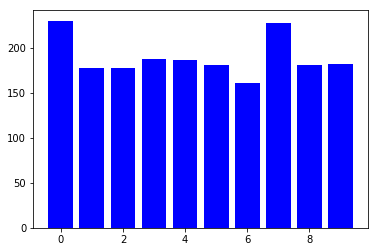

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis values to drug regimen names
regimen_names = regimen_data.index.tolist()


# Set y axis values to values from regimen data
num_subjects = regimen_data.tolist()

x_axis = np.arange(len(num_subjects))

plt.bar(x_axis, num_subjects, color="b", align="center")
# print(num_subjects)
# print(regimen_names)


In [8]:
# Y Axis: Create a list of lists to hold data values from summary table

# newList = []                                      # Create empty outer list to hold all lists of values for all drug regimens
# for x in range(0,10):                             # Create a for loop, where x is equal to the number of rows (drug regimens)
#     innerlist = []                                # Create an empty inner list, to hold values for a single row (drug regimen)
#     for y in range(0,5):                          # Create an inner for loop, where y is equal to the number of columns (drug regimen data)
#         y_value = Summary_Table.iloc[x,y]         # Set y_value equal to the x,y coordinates of summary table, to hold data from that row/column combination.
#         innerlist.append(y_value)                 # Add y_value to inner list 
#     newList.append(innerlist)                     # Append inner list (values of single drug regimen) to outer list
# print(newList)

## Pie plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas




(-1.2101537272442933,
 1.1077121695699783,
 -1.1046567928362272,
 1.1022210380848285)

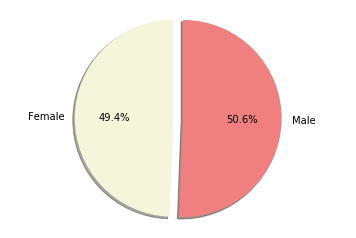

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Isolate mouse sex column as scalar
gender = mouse_study_df["Sex"]

# Find count of female mice
female = gender.loc[gender=="Female"].count()

# Find count of male mice
male = gender.loc[gender=="Male"].count()

# labels for each section of pie chart
labels = ["Female", "Male"]

# values of each section
sizes = [female, male]

# colors of each section of the pie chart
colors = ["beige", "lightcoral"]

# explode
explode = (0.1, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [45]:
capomulin_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"]=="Capomulin"), :]

# Find unique mice for capomulin
capomulin_mice = capomulin_df["Mouse ID"].unique()
capomulin_mice

# Filter total volume for max time point
# s185

# blop = capomulin_df.loc[(capomulin_df["Mouse ID"]== "s185"), 
#                         (capomulin_df["Timepoint"])|
#                         (capomulin_df["Tumor Volume (mm3)"])]
capomulin_df
final_capomulin = capomulin_df.sort_values("Timepoint", ascending = False)
# final_capomulin = final_capomulin.drop("Timepoint", axis=1)
final_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
134,r554,Capomulin,Female,8,17,45,32.377357,3
224,w914,Capomulin,Male,24,21,45,36.041047,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
338,w150,Capomulin,Male,23,23,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
361,s710,Capomulin,Female,1,23,0,45.000000,0


In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Note Need to find unique mice, then find the tumor volume at the final timepoint
# Create box plots showing each of these. 

# Filter out data for 4 drug regimens.  Create 1 variable to hold data for each drug 
capomulin_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"]=="Capomulin"), :]
ramicane_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"]=="Ramicane"), :]
infubinol_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"]=="Infubinol"), :]
ceftamin_df = mouse_study_df.loc[(mouse_study_df["Drug Regimen"]=="Ceftamin"), :]

# Filter variables to hold only rows for tumor volume
capomulin = capomulin_df["Tumor Volume (mm3)"]
ramicane = ramicane_df["Tumor Volume (mm3)"]
infubinol = infubinol_df["Tumor Volume (mm3)"]
ceftamin = ceftamin_df["Tumor Volume (mm3)"]



# Create a function to calculate quartiles, IQR, and outliers for a given drug and print the drug name.
def quartile_report(regimen, drug_name):
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"Summary report for {drug_name}:")
    print(f"    The lower quartile of tumor volumes is: {lowerq}")
    print(f"    The upper quartile of tumor volumes is: {upperq}")
    print(f"    The interquartile range of tumor volumes is: {iqr}")
    print(f"    The the median of tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"    Values below {lower_bound} could be outliers.")
    print(f"    Values above {upper_bound} could be outliers.")

# Print reports for each drug
capomulin_report = quartile_report(capomulin, "Capomulin")
ramicane_report = quartile_report(ramicane, "Ramicane")
infubinol_report = quartile_report(infubinol, "Infubinol")
ceftamin_report = quartile_report(ceftamin, "Ceftamin")

Summary report for Capomulin:
    The lower quartile of tumor volumes is: 37.685932865
    The upper quartile of tumor volumes is: 45.0
    The interquartile range of tumor volumes is: 7.314067135000002
    The the median of tumor volumes is: 41.557808879999996 
    Values below 26.714832162499995 could be outliers.
    Values above 55.9711007025 could be outliers.
Summary report for Ramicane:
    The lower quartile of tumor volumes is: 36.67463458499999
    The upper quartile of tumor volumes is: 45.0
    The interquartile range of tumor volumes is: 8.325365415000007
    The the median of tumor volumes is: 40.67323554 
    Values below 24.18658646249998 could be outliers.
    Values above 57.48804812250001 could be outliers.
Summary report for Infubinol:
    The lower quartile of tumor volumes is: 47.3123533
    The upper quartile of tumor volumes is: 57.314443967500004
    The interquartile range of tumor volumes is: 10.002090667500006
    The the median of tumor volumes is: 51.82058

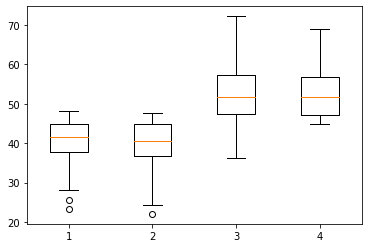

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin, ramicane, infubinol, ceftamin]
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
plt.show()

In [ ]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen